<a href="https://colab.research.google.com/github/sshar180/Machine-Learning-/blob/main/K_Means_color_segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 
In this assignment we will implement and test K-means algorithm for clustering and principal component analysis (PCA) for dimensionality reduction.  

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# make sure you import here everything else you may need

## Question 1. K-Means Clustering [Total: 30 pts]

In this exercise we will first implement K-means algorithm for clustering. Then we will perform color-based segmentation using K-means.



## K-means clustering implementation [10 pts]

Let us first implement K-means algorithm that accepts target number of clusters (K) and data vectors $\mathbf{x}_1,\ldots, \mathbf{x}_N$, each of length $d$. At this point, we will implement the K-means algorithm for general $d$; later we will test and visualize the results for $d=2,3$. 
			
A general K-means algorithm can be described as follows. 
Suppose we are given training examples $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N$, where each $\mathbf{x}_i \in \mathbb{R}^d$. We want to group the $N$ data samples into K clusters.  
* Initialize cluster centers $\mu_1,\ldots, \mu_K \in \mathbb{R}^d$ at random
* Repeat until convergence 
  * For every data point $\mathbf{x}_i$, update its label as 
  \begin{equation*}
  z_i = \text{argmin}_j \|\mathbf{x}_i - \mu_j\|_2^2. 
  \end{equation*}
  
  * For each cluster $j$, update its center $\mu_j$ as mean of all points assigned to cluster $j$: 
  $$ \mu_j = \dfrac{\sum_{i=1}^N \delta\{z_i = j\} \mathbf{x}_i}{\sum_{i=1}^N \delta \{z_i = j\}}.$$  
  $\delta\{z_i = j\}$ denotes an indicator function that is equal to 1 if $z_i = j$ and zero otherwise. $\sum_{i=1}^N\delta\{z_i = j\}$ indicates the number of points in $i$th cluster. 

We can define sum of squared errors (SSE) as 
$$ \text{SSE}  = \sum_j \sum_i \delta\{z_i = j\} \|\mathbf{x}_i - \mu_j\|_2^2$$`


Implement the K-means clustering algorithm as a function with the following specifications:

```python
def kmeans_clustering(data, K, max_iter = 100, tol = pow(10,-3)):
```
where 
1. 'data' is the $N \times d$ matrix that contains all data points ($N$ is the number of data points and $d$ is the number of features, each row of the matrix is a data point), 
2. 'K' is the number of clusters, 
3. 'max_iter' is the maxium number of iterations, and 
4. 'tol' is the tolerance for the change of the sum of squares of errors that determines convergence.

Your function should return the following variables: 
1. 'labels': this is an $N\times 1$ vector (where $N$ is the number of data points) where the $i$-th position of that vector contains the cluster number that the $i$-th data point is assigned to, 
2. 'centroids': this is a $K\times d$ matrix, each row of which contains the centroid for every cluster, 
3.  'SSE_history': this is a vector that contains all the sum of squares of errors per iteration of the algorithm, 
4. 'iters': this is the number of iterations that the algorithm ran.

Here we are going to implement the simplest version of K-means, where the initial centroids are chosen entirely at random among all the data points.

Your algorithm should converge if 1) the maximum number of iterations is reached, or 2) if the SSE between two consecutive iterations does not change a lot. 

In order to check for the latter condition, you may use the following piece of code:
```python
if np.absolute(SSE_history[it] - SSE_history[it-1])/SSE_history[it-1] <= tol
```



In [ ]:
# Function to calculate Sum of Squares Error Loss
def Sum_of_Squares_loss(X, y_pred, y_true, centroids, K):
  l = 0
  for i in centroids:
    for data_point, pred_label, true_label in zip(X, y_pred, y_true):
      if pred_label == true_label:
        d = np.linalg.norm(i - data_point, 2)
        d = d**2
        l = l+d
  return l

In [ ]:
# TODO 
# K-means clustering
def kmeans_clustering(data, K, y_true, max_iter=100, tol = pow(10,-3), random_state = 42): 
  # Inputs
  #   data - N x d array
  #   K - number of clusters
  #   max_iter - maximum iterations for K-means
  #   tol - stopping parameter that checks relative change in sum of squared errors
  # 
  # Outputs: 
  #   labels - cluster assignment label for each data sample (N values)
  #   centroid - centroids of each cluster (K vectors)
  #   SSE_history - table of SSE record at every iteration
  #   iter - total number of iterations at stopping/convergence

  # TODO
  # Write your function for K-means clustering

  # initialize random cluster centers
  # fix a seed for random number generator

  random_generation = np.random.default_rng(seed=random_state)
  min_value = np.min(data)
  max_value = np.max(data)

  centroids_values = []

  # Initializing the centroids 
  for i in range(K):
    centroids_values.append(random_generation.integers(low = min_value, high = max_value, size = data.shape[1]))

  iter = 0
  SSE_history = []

  #  Commencing the computations to label assignment, udating the centroid, and Loss Calculation over given number of iteration
  for iteration in range(max_iter):

    iter = iteration
    # calcluate distance and assign cluster to points
    labels = np.array([])
    for x in data:
      # Initializing the distance array to store the computer distance of data points from centroid 
      distance_value = np.array([])
      for j in centroids_values:
        # Appending all the computed distances into the org array
        distance_value = np.append(distance_value, np.linalg.norm(x - j,2))

      labels = np.append(labels, np.argmin(distance_value))
    # calculate new cluster centers
    center = []
    for x in range(K):
      label_datapoint = data[labels == x]
      if len(label_datapoint) > 0:
        center.append(np.mean(label_datapoint,axis=0))
      else :
        center.append(centroids_values[x])

    # check for loss
    loss = Sum_of_Squares_loss(data, labels, y_true, center, K)
    
    SSE_history.append(loss)
    
    tp = np.absolute(SSE_history[iteration] - SSE_history[iteration-1])/SSE_history[iteration-1]
    if iteration > 1 and tp <= tol:
      print ('Termination Cause => TOLERANCE', tp)
      break

    centroids_values = np.array(center)

  # return labels, centroids, SSE_history, iter
  return labels, centroids_values, SSE_history, iter

In [ ]:
# Created a sperate function meant to give plots of data points and centroids as output
def plotData(data, labels, K, new_centroids_value):
    center = np.array(new_centroids_value)
    for x in range(K):
        label_point = data[labels == x]
        plt.scatter(label_point[:, 0], label_point[:, 1], label_point[:,2], c=center[x])
    
    plt.scatter(center[:, 0], center[:, 1], c = 'blue', s=40, marker = '*')
    ax = plt.gca()
    ax.axis('equal')
    plt.show()

In [ ]:
# TODO 
# K-means clustering
def kmeans_clustering(data, K, y_true, max_iter=100, tol = pow(10,-3), random_state = 42): 
  # Inputs
  #   data - N x d array
  #   K - number of clusters
  #   max_iter - maximum iterations for K-means
  #   tol - stopping parameter that checks relative change in sum of squared errors
  # 
  # Outputs: 
  #   labels - cluster assignment label for each data sample (N values)
  #   centroid - centroids of each cluster (K vectors)
  #   SSE_history - table of SSE record at every iteration
  #   iter - total number of iterations at stopping/convergence

  # TODO
  # Write your function for K-means clustering

  # initialize random cluster centers
  # fix a seed for random number generator

  random_generation = np.random.default_rng(seed=random_state)
  min_of_data = np.min(data)
  max_of_data = np.max(data)

  centroids = []

  # Initializing the centroids 
  for i in range(K):
    centroids.append(random_generation.integers(low = min_of_data, high = max_of_data, size = data.shape[1]))

  iter = 0
  SSE_history = []

  #  Commencing the computations to label assignment, udating the centroid, and Loss Calculation over given number of iterations
  for epoch in range(max_iter):

    iter = epoch

    # calcluate distance and assign cluster to points
    labels = np.array([])
    for x in data:
      # Initializing the distance array to store the computer distance of data points from centroid
      distance = np.array([])
      for j in centroids:
        # Appending all the computed distances into the org array
        distance = np.append(distance, np.linalg.norm(x - j,2))
      labels = np.append(labels, np.argmin(distance))

    # calculate new cluster centers
    center = []
    for x in range(K):
      points_for_label = data[labels == x]
      if len(points_for_label) > 0:
        center.append(np.mean(points_for_label,axis=0))
      else :
        center.append(centroids[x])

    # check for loss
    loss = Sum_of_Squares_loss(data, labels, y_true, center, K)
    
    SSE_history.append(loss)


    if epoch > 1 and np.absolute(SSE_history[epoch] - SSE_history[epoch-1])/SSE_history[epoch-1] <= tol:
      print ('Termination Cause => TOLERANCE', np.absolute(SSE_history[epoch] - SSE_history[epoch-1])/SSE_history[epoch-1])
      break

    centroids = np.array(center)

  # return labels, centroids, SSE_history, iter
  return labels, centroids, SSE_history, iter


# Created a sperate function meant to give plots of data points and centroids as output
def plotData(data, labels, K, new_centroids):
    center = np.array(new_centroids)
    for x in range(K):
        points_for_label = data[labels == x]
        plt.scatter(points_for_label[:, 0], points_for_label[:, 1], points_for_label[:,2], c=center[x])
    
    plt.scatter(center[:, 0], center[:, 1], c = 'red', s=40, marker = '*')
    ax = plt.gca()
    ax.axis('equal')
    plt.show()

# A separate function to initialize centroids and update them but report NO LOSS (Built for the puspose of Selfie Problem)
def kmeans_clustering_noLoss(data, K, max_iter=100, tol = pow(10,-3), random_state = 42):
  random_generation = np.random.default_rng(seed=random_state)
  min_of_data = np.amin(data)
  max_of_data = np.amax(data)

  centroids = []

  for i in range(K):
      centroids.append([0.6]*data.shape[1])

  iter = 0
  SSE_history = []

  for epoch in range(max_iter):
      iter = epoch

      # Calculating distance for the puspose of assigning clusters to data points
      labels = np.array([])
      for x in data:
          distance = np.array([])
          for j in centroids:
              distance = np.append(distance, np.linalg.norm(x - j,2))
          labels = np.append(labels, np.argmin(distance))

      # Updating the centroids
      new_centroids = []
      for x in range(K):
          points = data[labels == x]
          if len(points) > 0:
              new_centroids.append(np.mean(points,axis=0))
          else :
              new_centroids.append(centroids[x])

      if np.all(np.array(centroids) == np.array(new_centroids)):
          print ('Termination Cause => NO CHANGE IN CENTROIDS')
          break

      centroids = np.array(new_centroids)

      if iter == max_iter:
          print ('!!! NOTE !!! ===> MAX ITERATIONS REACHED | NO FURTHER EXECUTIONS')

  print ('----- OUTPUT AFTER ', iter, ' COMPUTATIONS -----')
  plotData(data, labels, K, new_centroids)


  # return labels, centroids, SSE_history, iter
  return labels, centroids, SSE_history, iter

### Test K-means on simulated data with different values of K [3 pts]

Let us create synthetic data with `num_clusters` clusters in 2-dimensional space and apply K-means clustering. 

You should try with different values of `num_clusters` and `K'. 



(-13.232027394771677,
 13.871361924952618,
 -20.109856225568763,
 14.784451565045881)

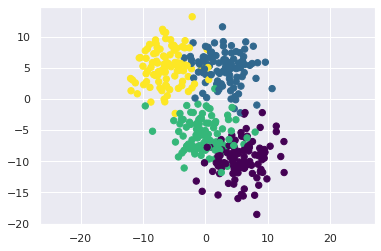

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import make_blobs

num_clusters = 4
X, y_true = make_blobs(n_samples=400,centers=num_clusters,cluster_std=3,random_state=10)

plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
ax = plt.gca()
ax.axis('equal')

Let us now run K-means using different values of K.

Try `K = [num_clusters-1, num_clusters, num_clusters+1]`

Termination Cause => TOLERANCE 0.0


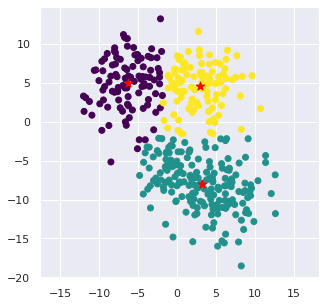

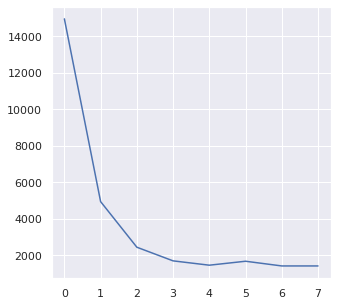


Termination Cause => TOLERANCE 0.02110482200137773


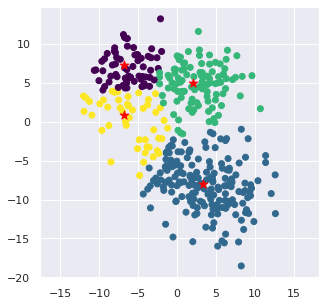

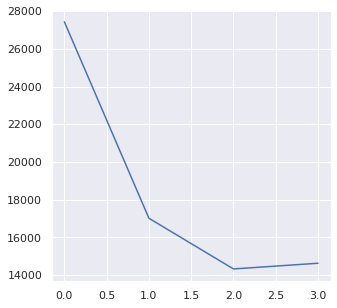


Termination Cause => TOLERANCE 0.023445832898492006


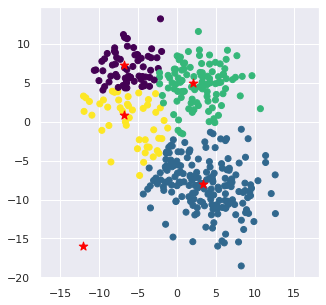

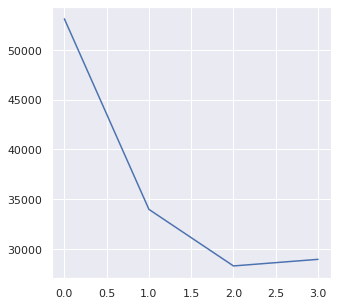

In [ ]:
# TODO 
# Run K-means for different values of K. 

for K in [num_clusters-1,num_clusters,num_clusters+1]:
  labels, centroids, SSE_history, iters = kmeans_clustering(X,K,y_true, max_iter=100, tol=1e-1, random_state = 42)

  # TODO 
  # plot your data (one color per cluster)
   
  # TODO 
  # plot SSE over different iterations 
  plt.figure(1, figsize=(5,5))
  cluster_centers = np.array(centroids)
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=80, cmap='viridis', marker = '*')
  ax = plt.gca()
  ax.axis('equal')
  plt.show()

  # TODO 
  # plot SSE over different iterations
  plt.figure(2, figsize=(5,5))
  plt.plot(SSE_history)
  plt.show()

  print()


### Answer the following questions [4 pts]

- Q: What happens to SSE at every iteration of K-means algorithm (did it increase/decrease)? [1 pt]

> A: Every iteration of the SSE displays a declining trend. This pattern can be seen because the cluster is taking on its ideal shape with each centroid update, which causes the loss to decrease.


- Q: How does the SSE change as you increase K ? [1 pt]

> A:  As seen in the previous figures, the SSE increases as the number of clusters increases. This is mostly caused by the fact that ownership of specific points belonging to a given cluster varies as the number of clusters rises, leading to misclassification. raising the SSE as a result.

- Q: What happens if you increase the `cluster_std` of blobs above to `cluster_std=5` ? [2 pts] 
```
X, y_true = make_blobs(n_samples=400,centers=num_clusters,cluster_std=3,random_state=10)
```

> A: When the cluster std is changed to 5, more data points overlap in the resulting plot. This leads to more points being incorrectly classified by the K-Means algorithm, which further increases SSE.

### Color segmentation/quantization [10 pts]

Now we will use K-means to perform segmentation/quantization on a color image. 

Each pixel in a given image will be a feature vector containing 3 color components (RGB). We will first group all colors into K clusters, which will provide us a color palatte. Then we will replace the color in every pixel with one of the colors in the color palatte (that is the centroid of the cluster in which RGB value of a pixel falls). 

We will use K-means script from previous step to segment your image into K clusters. To create a "quantized" output image, replace every pixel in your image with the center of the cluster assigned to it. Report your results for K= $\{2,4, 8, 16, 32, 64\}$ clusters.  

__You will need a colorful selfie__

Take a _selfie_ of yourself with a background that has different colors from your skin and clothing. 

Let us say you name the image `selfie.jpg`



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


uint8
(1024, 1024, 3)


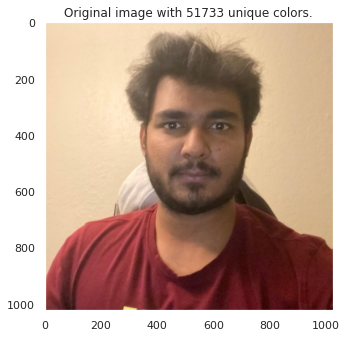

In [ ]:
# load and display an image with Matplotlib
from matplotlib import image

# load image as pixel array
img = image.imread('/content/drive/MyDrive/Selfie.jpg')
# summarize shape of the pixel array
print(img.dtype)
print(img.shape)

# You can debug your code using some other image, 
# but you must use your selfie for final results
# from sklearn.datasets import load_sample_image
# # load the picture 
# img = load_sample_image('china.jpg')

h, w, c = img.shape
unique_colors = np.unique(np.reshape(img,(h*w,c)),axis = 0)

plt.figure()
plt.clf()
ax = plt.axes([0, 0, 1, 1])
# plt.axis('off')
plt.grid(False)
plt.title('Original image with {0:d} unique colors.'.format(unique_colors.shape[0]))
plt.imshow(img)
plt.show()


Before performing the clustering, we will process the image data. 

1. You can crop or resize your image to a small size if the image is large. An image close to $100\times 100$ pixels will be sufficient for this experiment. 

2. Convert 8 bit integers to floats by dividing every pixel by 255 so that we can perform floating point operations and plot the arrays as images using plt.imshow that works well on float data in the range [0-1].



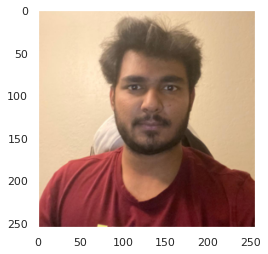

In [ ]:
# Resize image to speed things up

# Improting Image class from PIL module 
from PIL import Image 

# use resize function if needed 

# TODO (if necessary)

img = Image.open('/content/drive/MyDrive/Selfie.jpg')
img_size = img.size

# # modify the size 
new_size = np.asarray(img_size)/4
img = img.resize(new_size.astype(int))
img = np.asarray(img)
plt.imshow(img)
plt.grid(False)

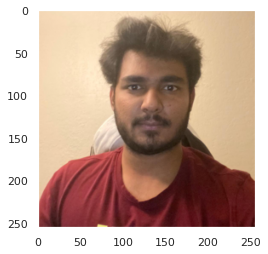

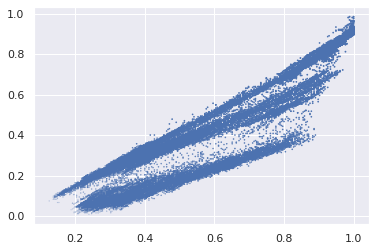

In [ ]:
# Preprocessing the data for clustering
# convert to float64 in range [0,1]
if np.max(img) > 1:
  img = np.array(img, dtype=np.float64) / 255
plt.imshow(img)
plt.grid(False)

# Load Image and transform to a 2D numpy array.
h, w, c = original_shape = tuple(img.shape)
assert c == 3
data = np.reshape(img, (w * h, c))

plt.figure()
plt.scatter(data[:,0],data[:,1],data[:,2])

In [ ]:
# A separate function to initialize centroids and update them but report NO LOSS (Built for the puspose of Selfie Problem)
def kmeans_clustering_noLoss(data, K, max_iter=100, tol = pow(10,-3), random_state = 42):
  random_generation = np.random.default_rng(seed=random_state)
  min_of_data = np.min(data)
  max_of_data = np.max(data)

  #List of Centroids
  centroids = []

  for i in range(K):
      centroids.append([0.6]*data.shape[1])

  iter = 0
  SSE_history = []

  for iteration in range(max_iter):
      iter = iteration

      # Calculating distance for the puspose of assigning clusters to data points
      labels = np.array([])
      for x in data:
          distance_value = np.array([])
          for j in centroids:
              d = np.linalg.norm(x - j,2)
              distance_value = np.append(distance_value, d)
          min_dis = np.argmin(distance_value)
          labels = np.append(labels, min_dis)

      # Updating the centroids controid_new
      controid_new = []
      for x in range(K):
          points = data[labels == x]
          if len(points) > 0:
              controid_new.append(np.mean(points,axis=0))
          else :
              controid_new.append(centroids[x])

      if np.all(np.array(centroids) == np.array(controid_new)):
          print ('Termination Cause => NO CHANGE IN CENTROIDS')
          break

      centroids = np.array(controid_new)

      if iter == max_iter:
          print ('!!! NOTE !!! ===> MAX ITERATIONS REACHED | NO FURTHER EXECUTIONS')

  print ('----- OUTPUT AFTER ', iter, ' COMPUTATIONS -----')
  plotData(data, labels, K, controid_new)


  # return labels, centroids, SSE_history, iter
  return labels, centroids, SSE_history, iter

Now we will perform two steps. 

1. K-means clustering for different values of K using the `kmeans_clustering` function above. 

2. Replace all the colors in the original image with the centroids of the cluster each of them belong to. This will give us a "segmented/quantized image" for different values of K; let us denote each image as `img_seg`. 

Plot the original image and the `img_seg` for `K = 2, 4, 8, 16, 32, 64.` 

Computing Results for K =  2


Termination Cause => NO CHANGE IN CENTROIDS
----- OUTPUT AFTER  8  COMPUTATIONS -----


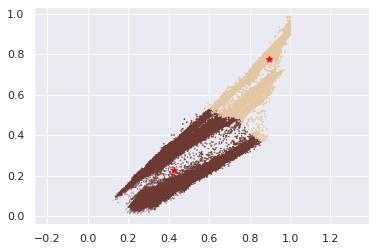

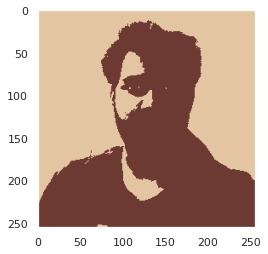

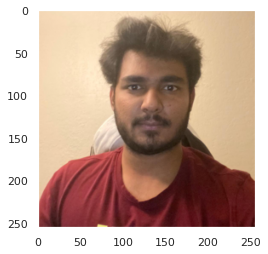

Computing Results for K =  4


Termination Cause => NO CHANGE IN CENTROIDS
----- OUTPUT AFTER  29  COMPUTATIONS -----


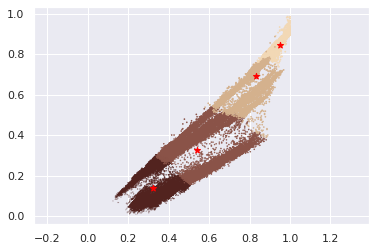

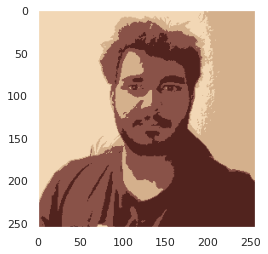

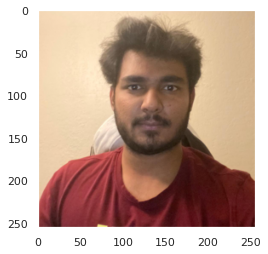

Computing Results for K =  8


Termination Cause => NO CHANGE IN CENTROIDS
----- OUTPUT AFTER  54  COMPUTATIONS -----


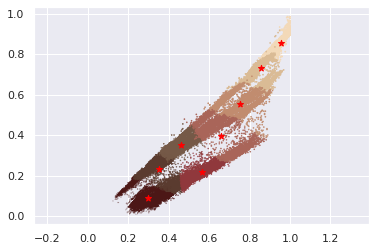

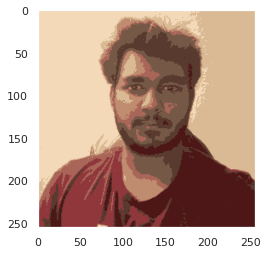

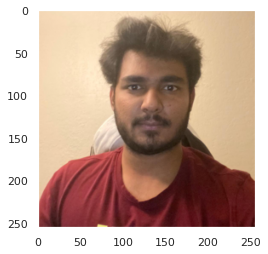

Computing Results for K =  16


----- OUTPUT AFTER  99  COMPUTATIONS -----


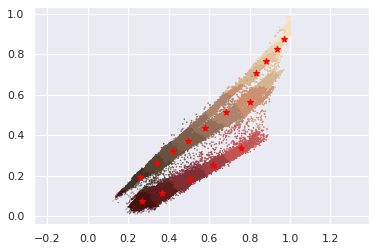

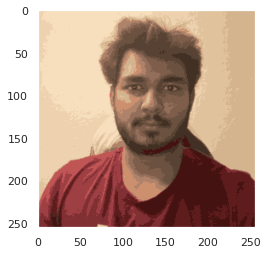

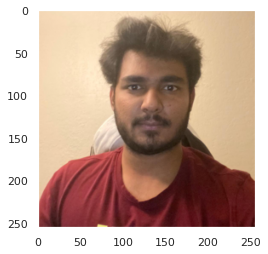

Computing Results for K =  32


----- OUTPUT AFTER  99  COMPUTATIONS -----


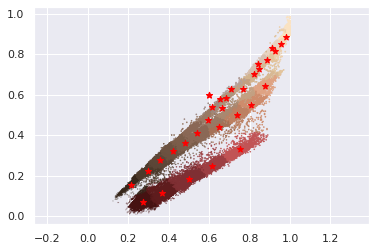

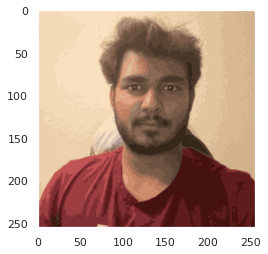

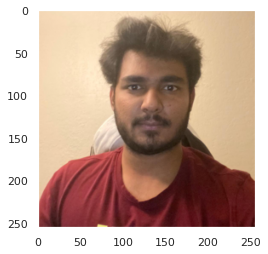

Computing Results for K =  64


KeyboardInterrupt: ignored

In [ ]:
# TODO
# For K = 2, 4, 8, 16, 32, 64 
  # Perform K-means clustering for different values of K on RGB pixels; 
  # this will give you K RGB values as centroids of K clusters

  # Create a quantized image based on your cluster assignment
  # Plot original and quantized images 


for K in [2, 4, 8, 16, 32, 64]:
  print ('Computing Results for K = ', K) 
  labels, centroids, SSE_history, iters = kmeans_clustering_noLoss(data,K,max_iter=100,tol=pow(10,-3))  
  print ()

  quantized_data = np.array([centroids[int(i)] for i in labels])
  quantized_image = np.reshape(quantized_data, (w ,h, c))
  plt.figure(1)
  plt.imshow(quantized_image)
  plt.grid(False)

  plt.figure(2)
  plt.imshow(img)
  plt.grid(False)
  plt.show()




### Answer the following questions [3 pts]

- Q: How many unique colors you have in the quantized image for K=2? [1 pt]

> A: 2 unique colors are noticed in the quantized image for K = 2

- Q: How is the quality of "quantized image" affected as you increase K? [1 pt]

> A: The image begins to become clearer and sharper as K rises. With an increase in K value, the overall quality of the image considerably improves.

- Q: What value of K provides you best quality for the "quantized image"? [1 pt]

> A: Values of K as 32 and 64 gave somewhat similar but the best quality for the quantized image

## Question 2. Eigen Faces via Principal Component Analysis [15 pts]

In this question, we will 

- Compute the PCA for a simple data set using SVD.
- Visualize the PCA for images


__Load dataset__

We will use a dataset of cropped face images called LFW ("Labeled Faces in the Wild").

This face dataset was taken from news articles about 10 years ago.  The full data set has thousands of faces, but we will use a small subset here.  Since this data set is widely-used, it is installed as part of the `sklearn`. 

We first download the data.  This is large and can take several minutes.

In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Once the data is loaded, we can get see the dimensions

In [ ]:
# Get images
n_samples, h, w = lfw_people.images.shape
npix = h*w

# Data in 2D form
X = np.transpose(lfw_people.data) 

# NOTE: In many of the libraries the data is stored as N x d array, 
# where N is the number of training samples and d is the length of each data vector
# Since we use a different notation in the class, I will stick with that. 

# Data array has dimensions 1850 x 1288 -- (pixels) x (faces)
# Each data vector is stored as a column in the matrix. 

# Labels of images 
y = lfw_people.target
target_names = lfw_people.target_names 

print("Image size     = {0:d} x {1:d} = {2:d} pixels".format(h,w,npix))
print("Number faces   = {0:d}".format(n_samples)) 

Image size     = 50 x 37 = 1850 pixels
Number faces   = 1288


__Plotting the Faces__

We will plot a few faces to look at the dataset.

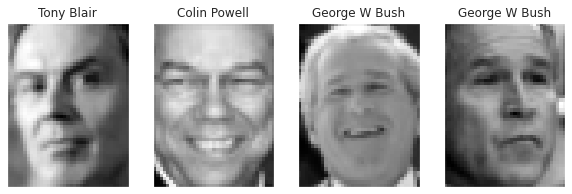

In [ ]:
def plt_face(x):
    h = 50
    w = 37
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
I = np.random.permutation(n_samples)
plt.figure(figsize=(10,20))

T = 4
for i in range(T):    
    ind = I[i]
    plt.subplot(1,T,i+1)
    plt_face(X[:,ind])
    plt.title(target_names[y[ind]])

### Computing the PCA via SVD 
To compute principal components (PCs), you will perform two steps. 

1. Subtract the mean from the data set.
2. Compute the singular value decomposition (SVD)

Suppose $X$ is the $D\times N$ data matrix. ($D$ is the number of pixels in each image, $N$ is the number of images.)

You will first remove mean column from all the columns (because data vectors are stored as columns). 

``` Xs = X - np.mean(X,1,keepdims = True) ``` 

Then we will compute an SVD of mean-substracted data as 

``` U_, S_, Vt_ = np.linalg.svd(Xs, full_matrices=False)```

Note that in python the SVD returns a list of singular values and `V.T` instead of `V`. 
The `full_matrices` option gives the *economy* SVD


In [ ]:
# Compute SVD 

# subtract mean from the dataset 
# since data vectors are stored as columns, the mean of columns should be zero

npix = h*w
Xmean = np.mean(X,1,keepdims=True)
Xs = X - Xmean

U_,S_,Vt_ = np.linalg.svd(Xs, full_matrices=False)

Text(0.5, 0, 'index')

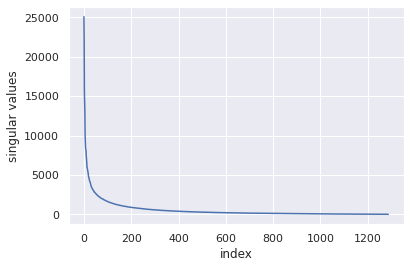

In [ ]:
# We can plot the singular values

plt.figure()
plt.plot(S_)
plt.ylabel('singular values')
plt.xlabel('index')

Next we will approximate the data using $r$ principal components/factors as

    X ~= Xhat = Xmean + U.dot(Z) 
    
The terms

*  `U` are the top-$r$ principal components/factors from `U_` computed from data.
*  `Z` are the coefficients of data samples (or projections onto principal components). Note that we can compute $Z = U^T X$.  

For instance, we can compute $Z$ for $r = 20$ and the approximate data as

In [ ]:
# Compute Z for r = 20 
N = X.shape[1]
Z = U_.T.dot(Xs) 

r = 20
Xest = Xmean + U_[:,:r].dot(Z[:r,:])

[ 230 1213  651]
Approximated faces (above)


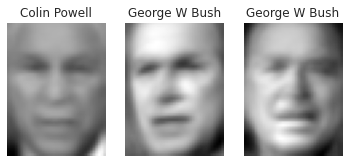

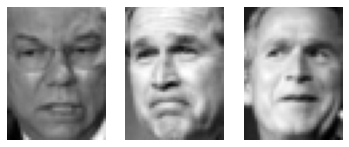

Original faces (below)


<Figure size 432x288 with 0 Axes>

In [ ]:
# plot some sample images
T = 3; 
inds = np.random.permutation(n_samples)
inds = inds[:T]
print(inds)

# plot approximated faces
print('Approximated faces (above)')
for i in range(T):
  plt.subplot(1,T,i+1)
  # plt.imshow(np.reshape(Xest[:,inds[i]],(h,w)))
  plt_face(Xest[:,inds[i]])
  plt.grid(False)
  plt.axis('off')
  plt.title(target_names[y[inds[i]]])
  if i == 0:
    plt.ylabel('Approximation')

plt.show()

# plot original faces 
for i in range(T):
  plt.subplot(1,T,i+1)
  # plt.imshow(np.reshape(X[:,inds[i]],(h,w)))
  plt_face(X[:,inds[i]])
  plt.grid(False)
  plt.axis('off')
  # plt.title(target_names[y[inds[i]]])
  if i == 0:  
    plt.ylabel('Original')

plt.show()
plt.tight_layout()

print('Original faces (below)')

### Plotting Approximated Images from PCs [10 pts]

We will now plot the images approximated using different values of $r$. 

Select 3 images at random from the dataset and find its approximation using top  $r$ factors for $r = \{0, 5, 10, 50, 100, 200\}$. 

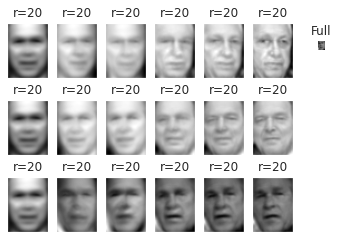

In [ ]:
# TODO 
  # select 3 images
  # select r = [0, 5, 10, 50, 100, 200]
  # find approximation of selected images and plot them

T = 3                             # number of faces to plot
r_list = [0, 5,10,50,100, 200]    # number of SVD approximations
nr = len(r_list)

# TODO 
# Select random faces 
inds = np.random.permutation(n_samples)
inds = inds[:T]

# TODO 
# Loop over figures
# compute approximation with r factors 
iplto = 0
for ind in inds:
    for rn in r_list:
        plt.subplot(T,nr+1,iplto+1)
        
        # Reconstruct with SVD
        # TODO  
        # Xhati = ???  # estimate of image in the r-dim subspace
        Xhati = Xmean + U_[:,:rn].dot(Z[:rn,:])

        plt_face(Xhati[:,ind])
        plt.title('r={0:d}'.format(r))
        iplto += 1
    
    # Plot the true face
    plt.subplot(iplto,nr+1,iplto+1)
    plt_face(X[:,ind])
    plt.axis('off')
    plt.title('Full')
    iplto += 1

Finally, pick 10 top PCs and plot them as images. 

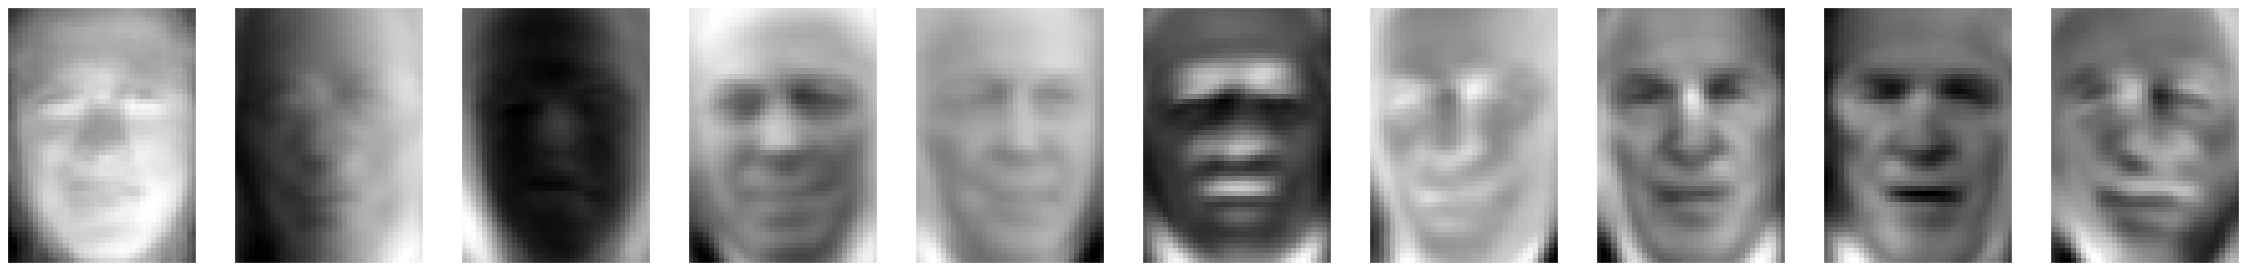

In [ ]:
# TODO 
  # Plot first 10 PCs (i.e., columns in U_) as images
plt.figure(figsize=(40,60))
C = 10
for i in range(C):    
    plt.subplot(1,C,i+1)
    plt_face(U_[:,i])


### Best and Worst Approximation [5 pts]

You can convince yourself that the $\ell_2$ norm of the approximation error of any data vector is same as the $\ell_2$ norm of the unused coefficients. 

Using this property, find the best and worst 5 images in the dataset that give smallest and largest error in approximation with top 200 PCs? Plot them. 

Text(0, 0.5, 'Z residual')

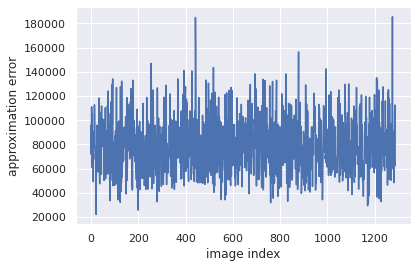

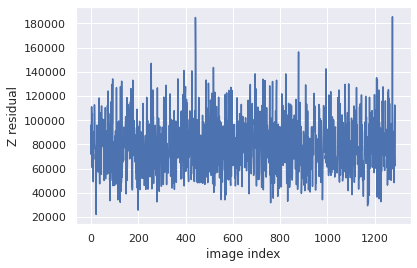

In [ ]:
# We can compute the L2 norm of the approximation error for each image as 
# the L2 norm of the unused coefficients

r = 200
Xest = Xmean + U_[:,:r].dot(Z[:r,:])

est_error = np.sum(pow(Xest-X,2),axis=0)
plt.figure()
plt.plot(est_error)
plt.xlabel('image index')
plt.ylabel('approximation error')


Z_residual = np.sum(pow(Z[r:,:],2),axis=0)
plt.figure()
plt.plot(Z_residual)
plt.xlabel('image index')
plt.ylabel('Z residual')


 "Worst" images reconstructed with 200 PCs


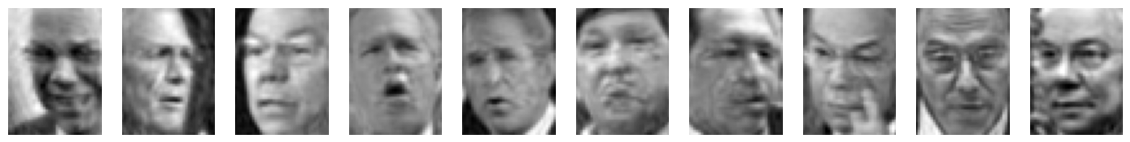

In [ ]:
# TODO
# Plot the "Worst/Hardest" images to reconstruct with 200 PCs

# Sort error/residual in decreasing order and pick top 5 indices 

# your code goes here 
error = pow(Xest-X,2)
sorting = np.argsort(np.sum(error,axis=0))[-10:]

# your code goes here 

plt.figure(figsize=(20,30))
print(' "Worst" images reconstructed with 200 PCs')
P = sorting
for klx,i in enumerate(P):    
    plt.subplot(1,len(P),klx+1)
    plt_face(Xest[:,i])

 "Best" images reconstructed with 200 PCs


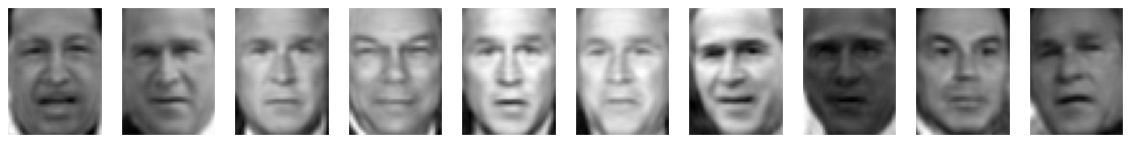

In [ ]:
# TODO
# Plot the "Best/Easiest" images to reconstruct with 200 PCs

# Sort error/residual in increasing order and pick top 5 indices 

# your code goes here 
error = pow(Xest-X,2)
sorting = np.argsort(np.sum(error,axis=0))[:10]

# your code goes here 

plt.figure(figsize=(20,30))
print(' "Best" images reconstructed with 200 PCs')
P = sorting
for klx,i in enumerate(P):    
    plt.subplot(1,len(P),klx+1)
    plt_face(Xest[:,i])


---
## Submission instructions
1. Download this Colab to ipynb, and convert it to PDF. Follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF.
 - Download your .ipynb file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded .ipynb file to the area. Or click `Upload to session storage` icon and then select & upload your .ipynb file.
 - Conversion using %%shell. 
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf name_of_hw.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.


  

2. Upload the PDF to Gradescope, select the correct pdf pages for each question. **Important!**

3. Upload the ipynb file to Gradescope


Notice:
In case of errors in conversion, please check your LaTeX and debug. In Markdown, when you write in LaTeX math mode, do not leave any leading and trailing whitespaces inside the dollar signs ($). For example, write `(dollarSign)\mathbf(dollarSign)(dollarSign)` instead of `(dollarSign)(space)\mathbf{w}(dollarSign)`. Otherwise, nbconvert will throw an error and the generated pdf will be incomplete. [This is a bug of nbconvert.](https://tex.stackexchange.com/questions/367176/jupyter-notebook-latex-conversion-fails-escaped-and-other-symbols)


In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,567 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,342 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 Packages [43.9 kB]
Ign:13 https://developer.download.nvidia.com/compute/machin

In [ ]:
!jupyter nbconvert --log-level CRITICAL --to pdf Copy_of_fall2022_hw4.ipynb # make sure the ipynb name is correct